In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

# random forest package
from sklearn.ensemble import RandomForestRegressor

# xgBoost package
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


# print("xgboost", xgboost.__version__)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


In [2]:
# load data 
df = pd.read_csv("data.csv",encoding="latin-1")

In [3]:
print (df.shape)
df.describe()

(107578, 18)


,artist_birth_year,artist_death_year,estimate_high,estimate_low,hammer_price,measurement_depth_cm,measurement_height_cm,measurement_width_cm
count,107578.000000,71186.000000,6.840400e+04,6.840900e+04,1.012540e+05,107578.000000,107578.000000,107578.000000
mean,1916.697011,1979.876352,1.308885e+05,9.323845e+04,8.765909e+04,3.015979,67.641823,65.471063
std,29.645913,27.163922,7.857577e+05,5.450646e+05,5.898940e+05,16.889542,74.558581,70.252308
min,1824.000000,1898.000000,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000
25%,1899.000000,1968.000000,5.000000e+03,4.000000e+03,3.000000e+03,0.000000,28.000000,25.000000
50%,1925.000000,1986.000000,1.500000e+04,1.000000e+04,1.200000e+04,0.000000,51.000000,49.000000
75%,1937.000000,2004.000000,6.000000e+04,4.000000e+04,4.250000e+04,0.000000,84.000000,81.000000
max,1977.000000,2013.000000,6.000000e+07,4.000000e+07,7.850000e+07,899.000000,10993.000000,5225.000000


In [4]:
# preview the data
df.head(10)

,artist_birth_year,artist_death_year,artist_name,artist_nationality,auction_date,category,currency,edition,estimate_high,estimate_low,hammer_price,location,materials,measurement_depth_cm,measurement_height_cm,measurement_width_cm,title,year_of_execution
0,1902,1982.0,Wifredo Lam,Cuban,1987-11-18T01:00:00.000Z,Painting,USD,NaN,NaN,NaN,280000.0,New York,oil on canvas,0,102,127,The night,1944
1,1902,1982.0,Wifredo Lam,Cuban,2005-06-12T00:00:00.000Z,Painting,EUR,NaN,NaN,NaN,30000.0,Versailles,Works on Paper,0,51,41,Untitled,1964
2,1902,1982.0,Wifredo Lam,Cuban,1994-05-17T00:00:00.000Z,Painting,USD,NaN,NaN,NaN,95000.0,New York,oil on canvas,0,79,102,idols,1955
3,1902,1982.0,Wifredo Lam,Cuban,1987-05-19T00:00:00.000Z,Unclassified,USD,NaN,NaN,NaN,2800.0,New York,Works on Paper,0,33,23,Camel,1973
4,1902,1982.0,Wifredo Lam,Cuban,2002-09-19T04:00:00.000Z,Unclassified,USD,NaN,2500.0,1500.0,1300.0,NaN,NaN,0,0,0,WIFREDO LAM,NaN
5,1902,1982.0,Wifredo Lam,Cuban,2009-06-02T22:00:00.000Z,Unclassified,EUR,NaN,400.0,300.0,NaN,NaN,NaN,0,0,0,0,NaN
6,1902,1982.0,Wifredo Lam,Cuban,2015-03-26T00:00:00.000Z,Drawing & Watercolor,EUR,NaN,NaN,NaN,-1.0,Paris,wax crayon and ballpoint pen on paper,0,88,124,Untitled ( Three Compositions ),1960
7,1902,1982.0,Wifredo Lam,Cuban,2006-11-20T01:00:00.000Z,Unclassified,USD,NaN,40000.0,30000.0,30000.0,New York,oil and charcoal,0,46,36,Totem,1972
8,1902,1982.0,Wifredo Lam,Cuban,2008-09-14T00:00:00.000Z,Unclassified,USD,NaN,12000.0,10000.0,5000.0,Cincinnati,pen and colored pencil on newsprint,0,36,28,Untitled (Horse woman),Circa\r\t\t\t1953
9,1902,1982.0,Wifredo Lam,Cuban,1990-11-20T01:00:00.000Z,Sculpture,USD,NaN,NaN,NaN,4000.0,New York,Sculpture,13,38,43,till,1977


In [5]:
# check data types
df.dtypes

artist_birth_year          int64
artist_death_year        float64
artist_name               object
artist_nationality        object
auction_date              object
category                  object
currency                  object
edition                   object
estimate_high            float64
estimate_low             float64
hammer_price             float64
location                  object
materials                 object
measurement_depth_cm       int64
measurement_height_cm      int64
measurement_width_cm       int64
title                     object
year_of_execution         object
dtype: object

# Missing Values

In [6]:
(df.isnull().sum() / len(df)) * 100  

artist_birth_year         0.000000
artist_death_year        33.828478
artist_name               0.000000
artist_nationality        0.000000
auction_date              0.000000
category                  0.000000
currency                  0.000000
edition                  87.566231
estimate_high            36.414509
estimate_low             36.409861
hammer_price              5.878525
location                 16.587964
materials                 1.709457
measurement_depth_cm      0.000000
measurement_height_cm     0.000000
measurement_width_cm      0.000000
title                     0.427597
year_of_execution        25.804533
dtype: float64

#### To visualize the missingness 

[Text(0,0.5,'% missing'), Text(0.5,1,'Percent missing data by feature')]

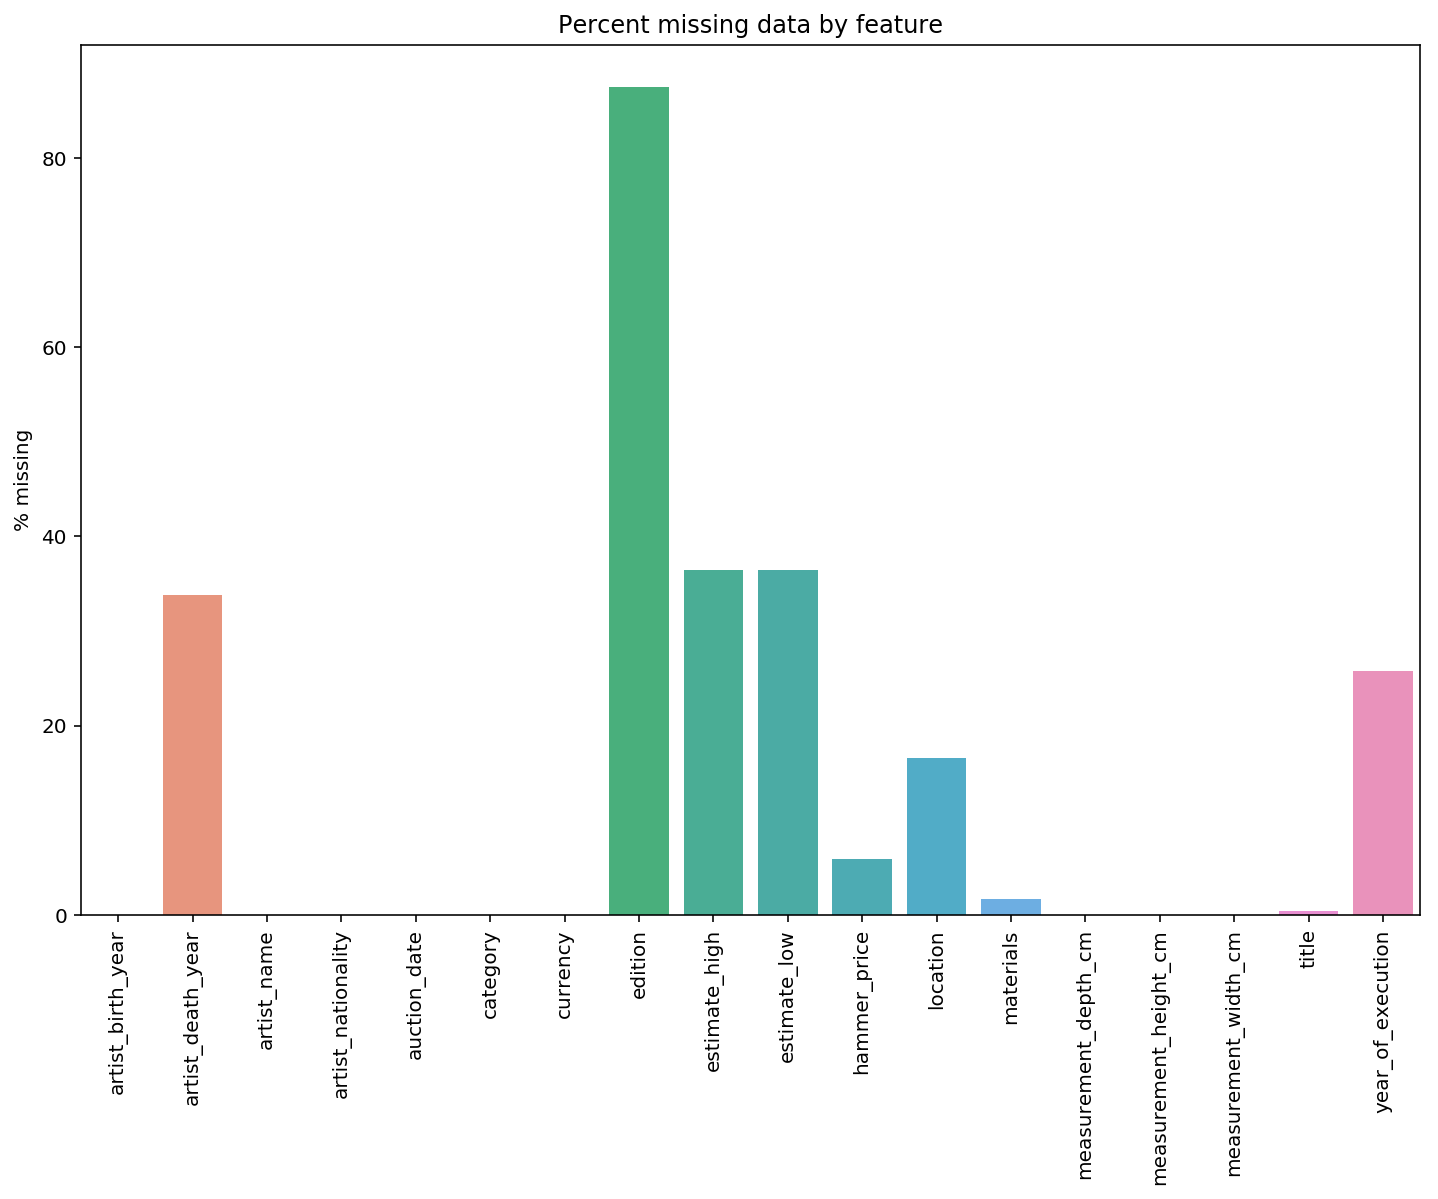

In [7]:
df_na=(df.isnull().sum() / len(df)) * 100  

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

# Check Outliers

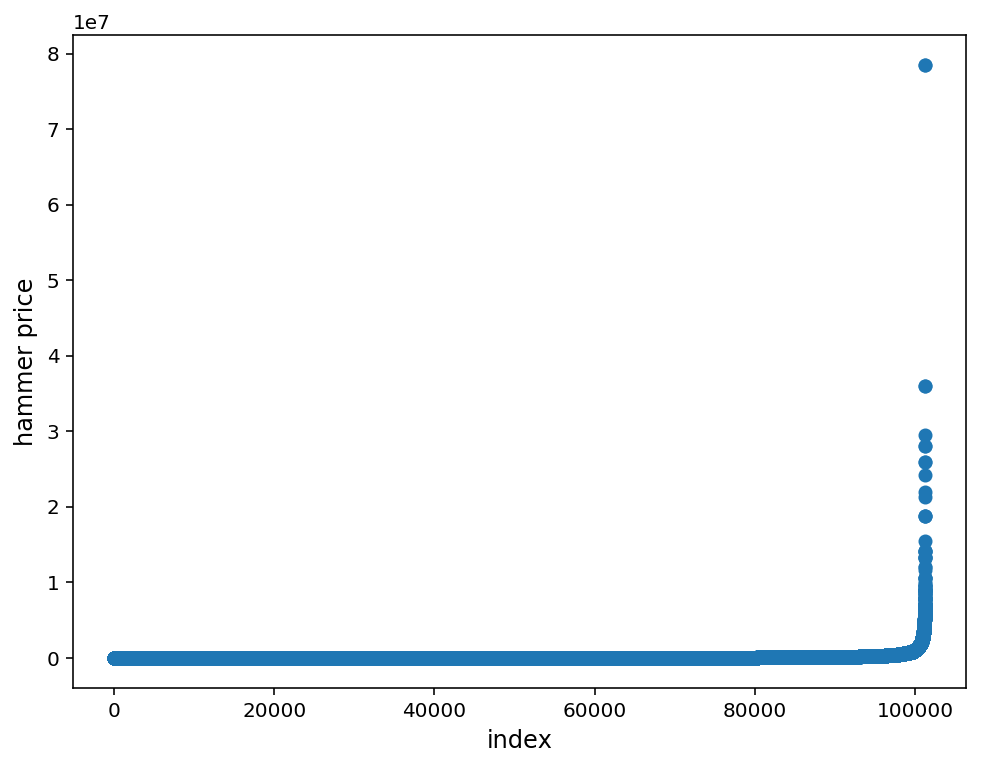

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.hammer_price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('hammer price', fontsize=12)
plt.show()

## Filter the outliers 

In [9]:
# Filter the data with prices above 0 dollars
df_1 = df[pd.notnull(df['hammer_price'])]
df_1=df_1.loc[df_1['hammer_price'] > 0]

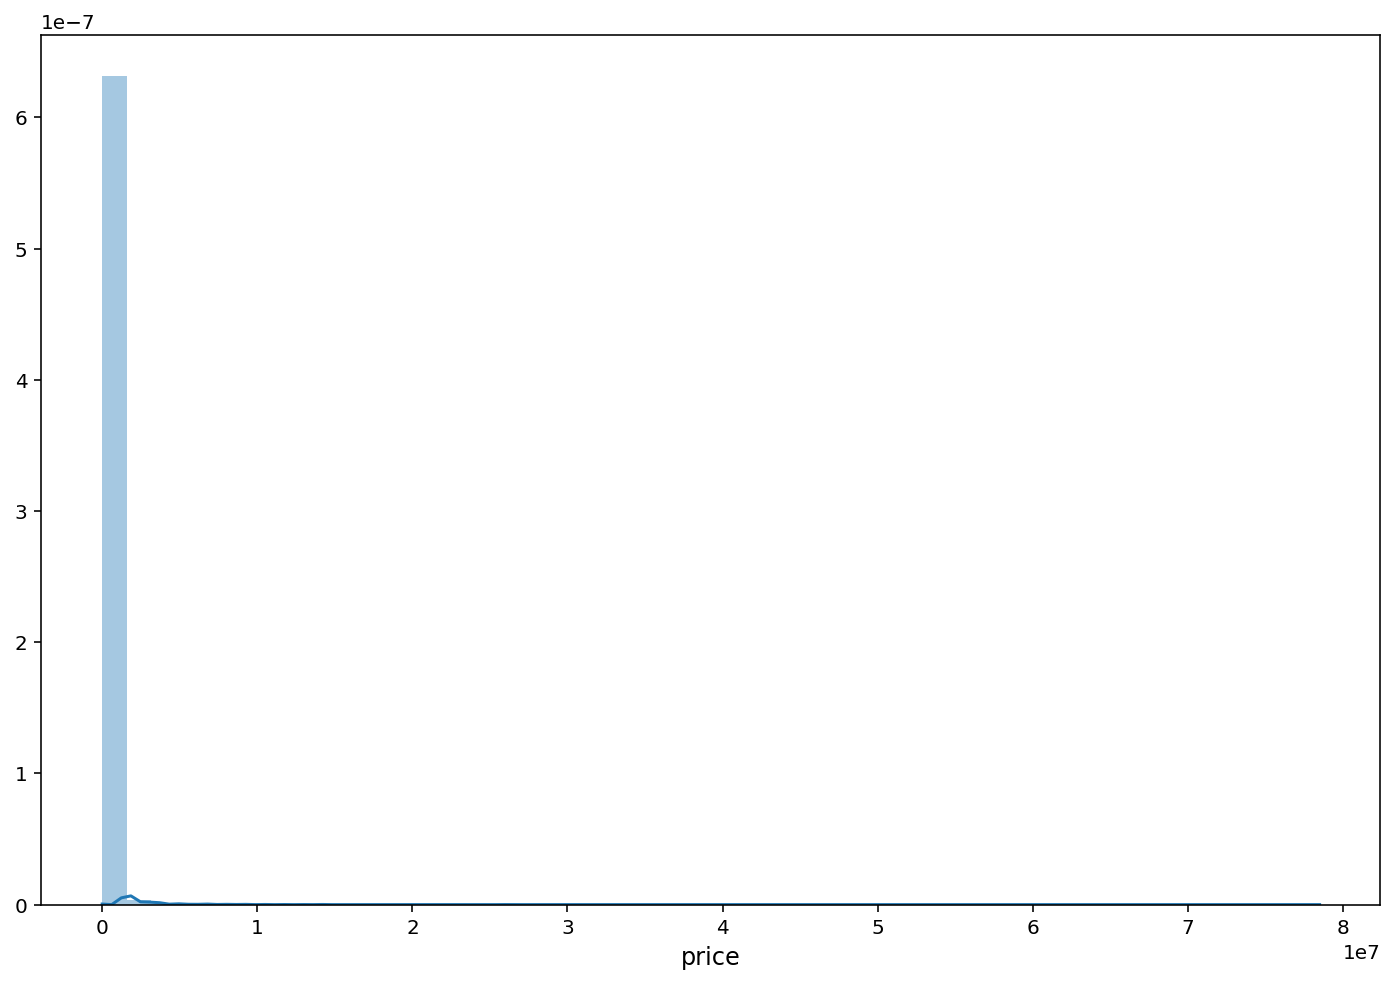

In [10]:
# visualize the distribution
plt.figure(figsize=(12,8))
sns.distplot(df_1.hammer_price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [11]:
# compute the skewness 
df_1.hammer_price.skew()


59.37841973858886

In [12]:
df_1.hammer_price.describe()

count    9.098000e+04
mean     9.755818e+04
std      6.215344e+05
min      1.450000e+00
25%      4.600000e+03
50%      1.500000e+04
75%      5.000000e+04
max      7.850000e+07
Name: hammer_price, dtype: float64

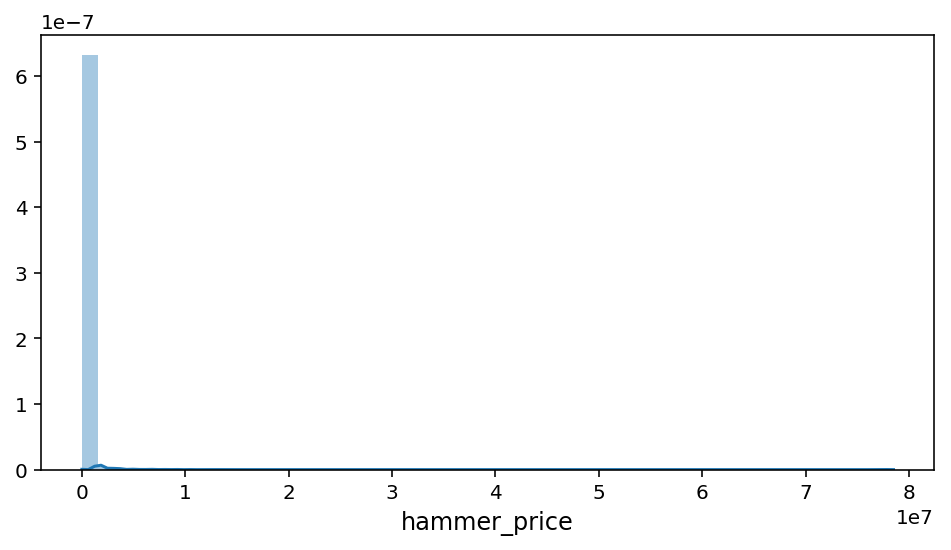

In [14]:
#sns.distplot(df_1.hammer_price)
#sns.distplot(np.log(df_1.hammer_price))
plt.figure(figsize=(8,4))
sns.distplot((df_1.hammer_price.values), bins=50, kde=True)
plt.xlabel('hammer_price', fontsize=12)
plt.show()

### Log Transform the Price

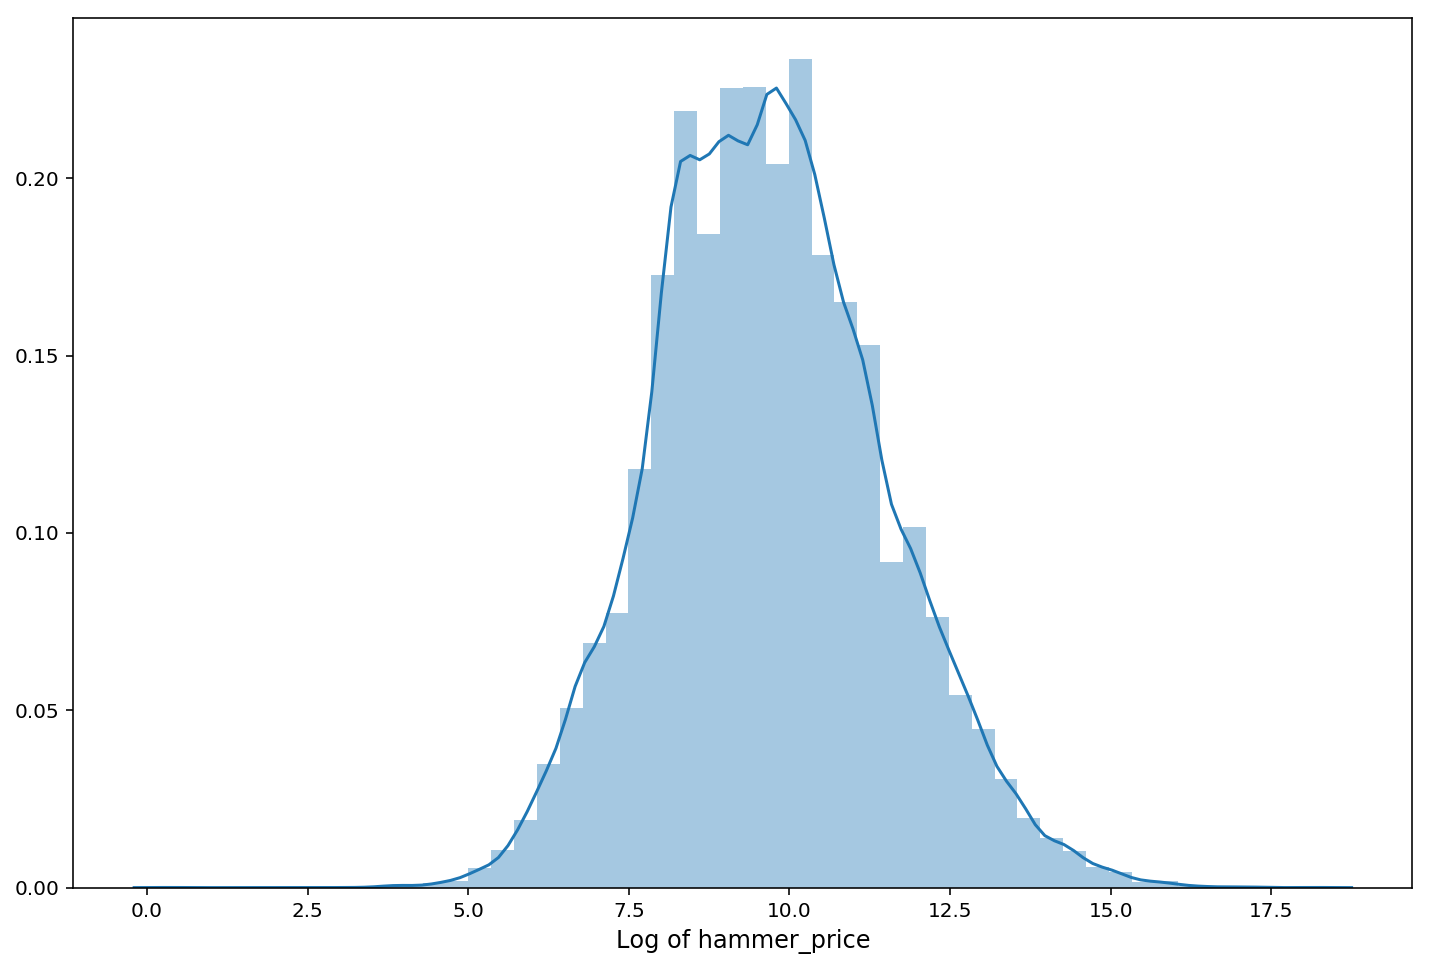

In [15]:
#sns.distplot(np.log(df_1.hammer_price))
plt.figure(figsize=(12,8))
sns.distplot(np.log(df_1.hammer_price.values), bins=50, kde=True)
plt.xlabel('Log of hammer_price', fontsize=12)
plt.show()

In [16]:
np.log(df_1.hammer_price).skew()

0.24235803370695155

#### the skewness becomes much smaller from 59 to 0.2

In [25]:
# add log transformed price into the dataframe
df_1['log_price'] = np.log(df_1.hammer_price)

In [18]:
# Correlation Between Numerical Features

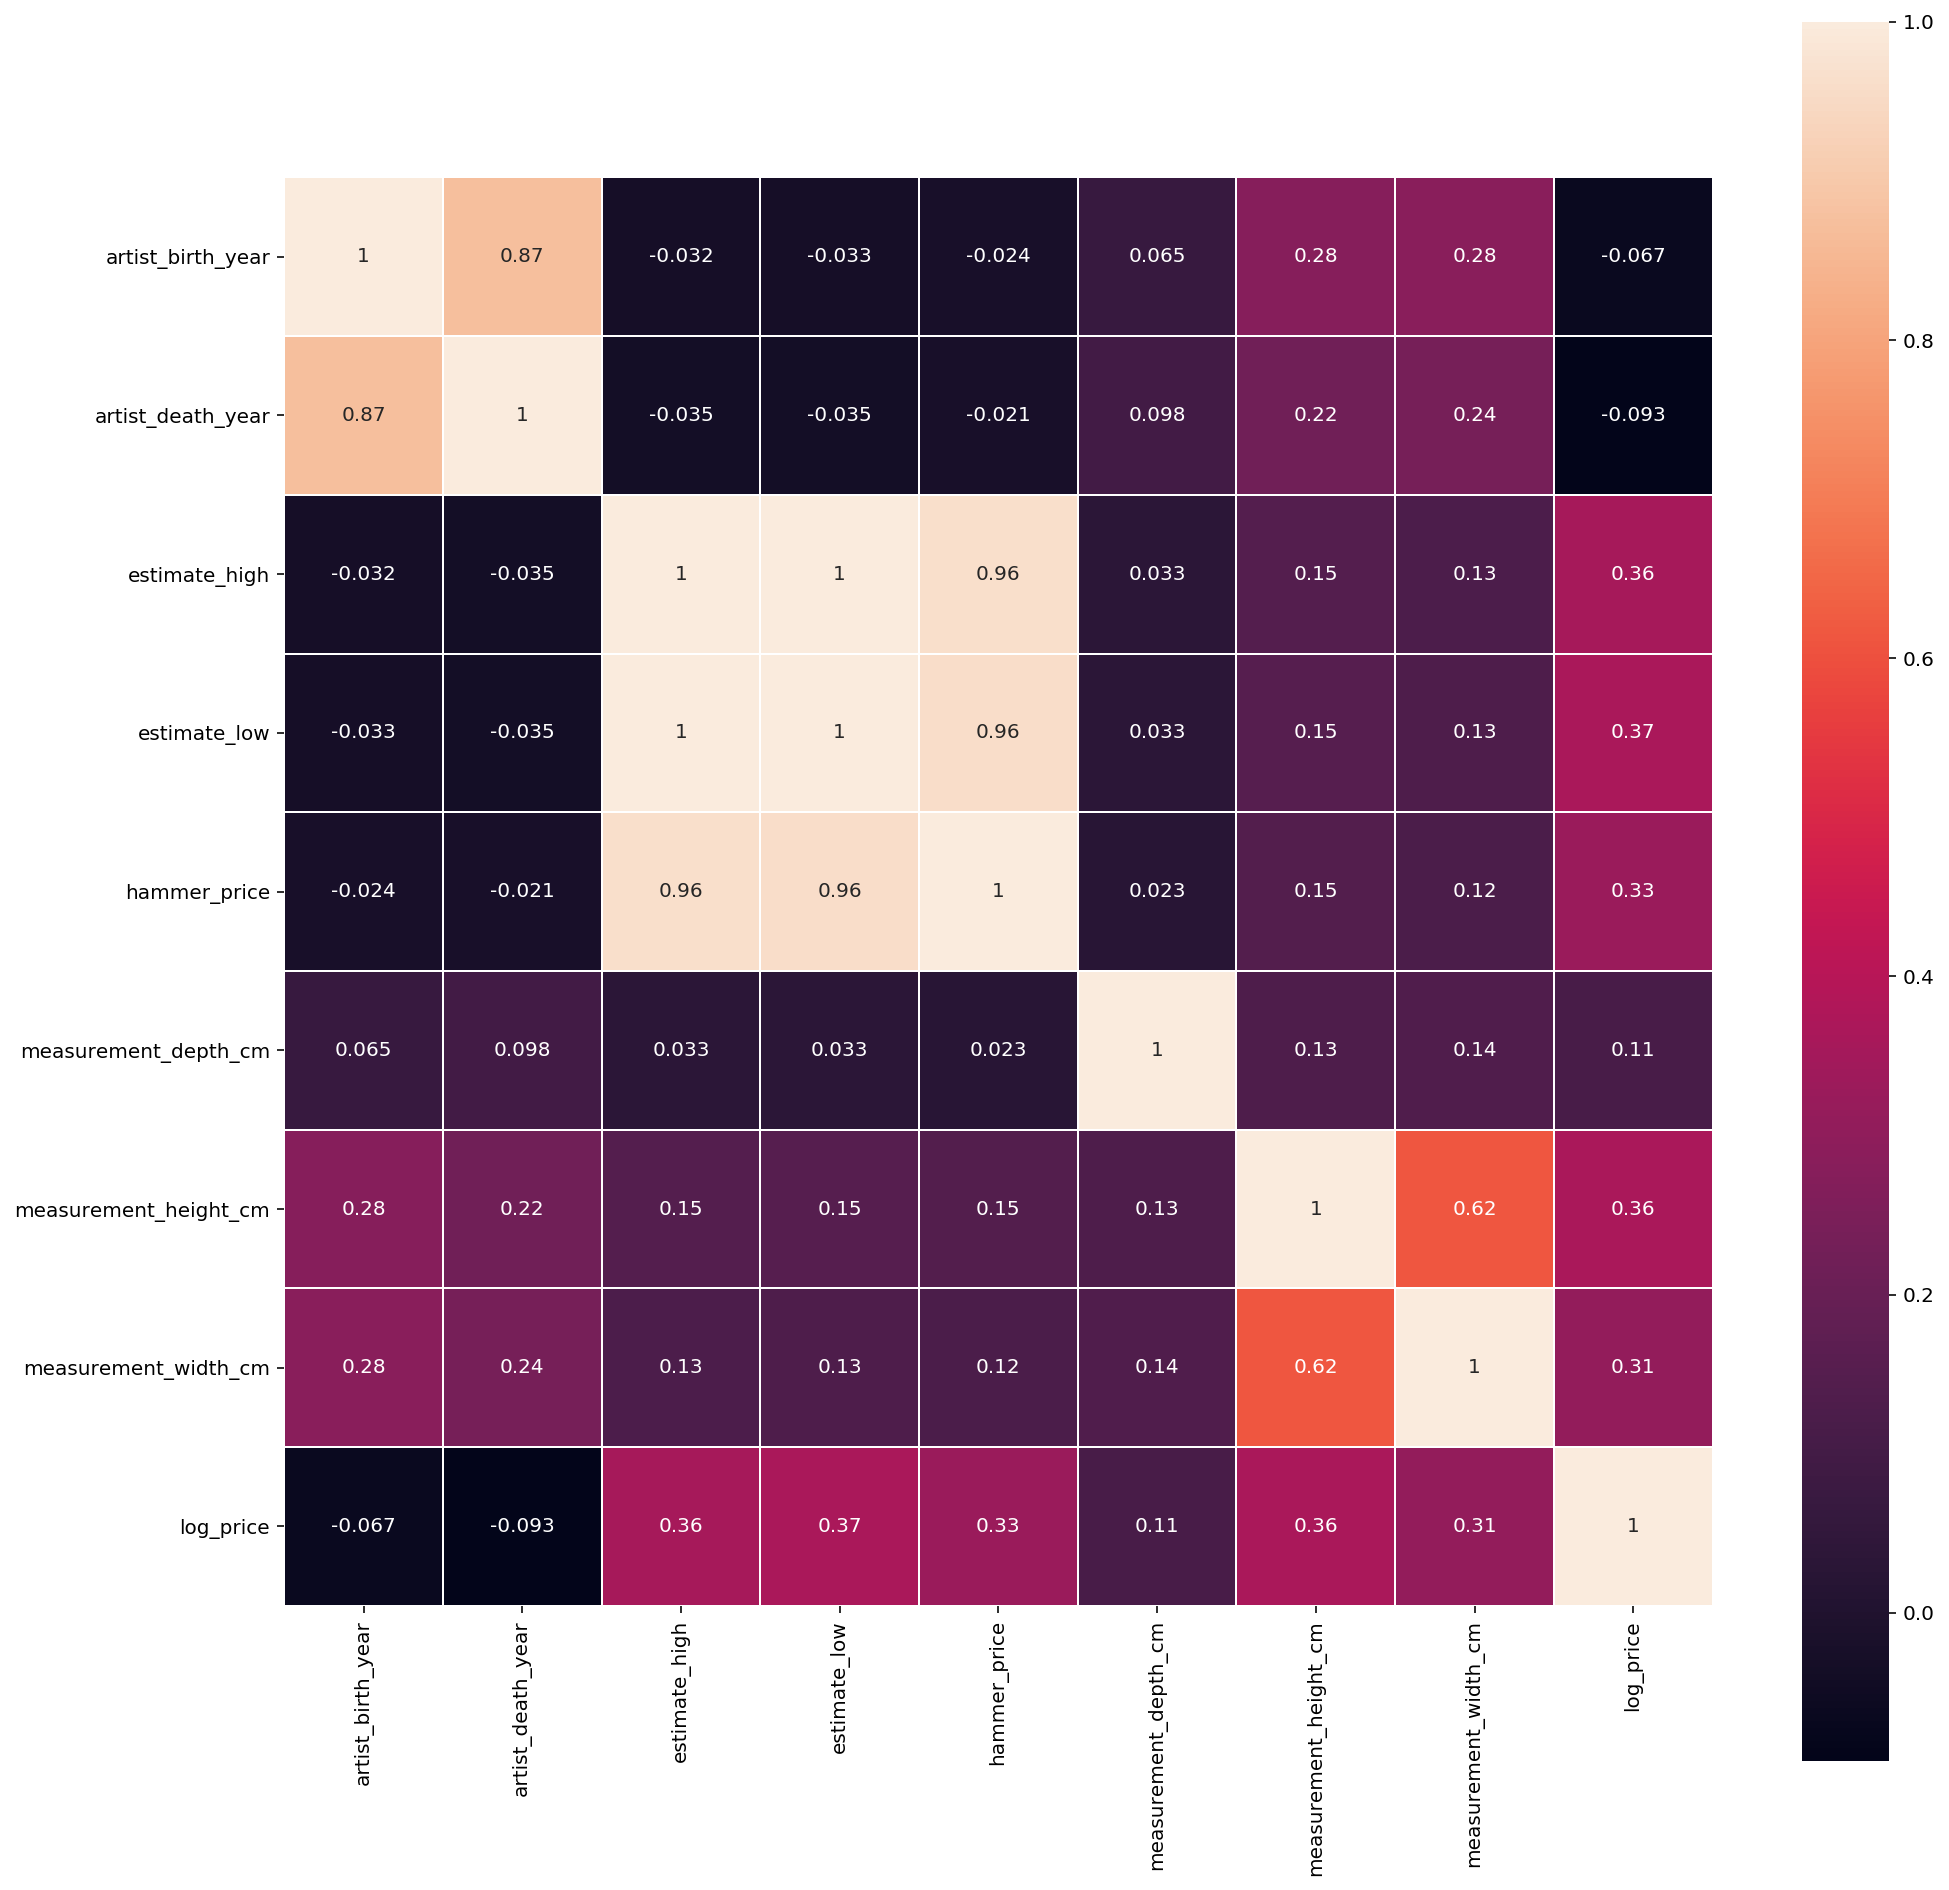

In [26]:
corrmat=df_1.corr()

sns.set_context(rc={"figure.figsize": (16, 16)})
f, ax = plt.subplots(figsize=(16, 16))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)



## Hammer Price according to the Birth Year 

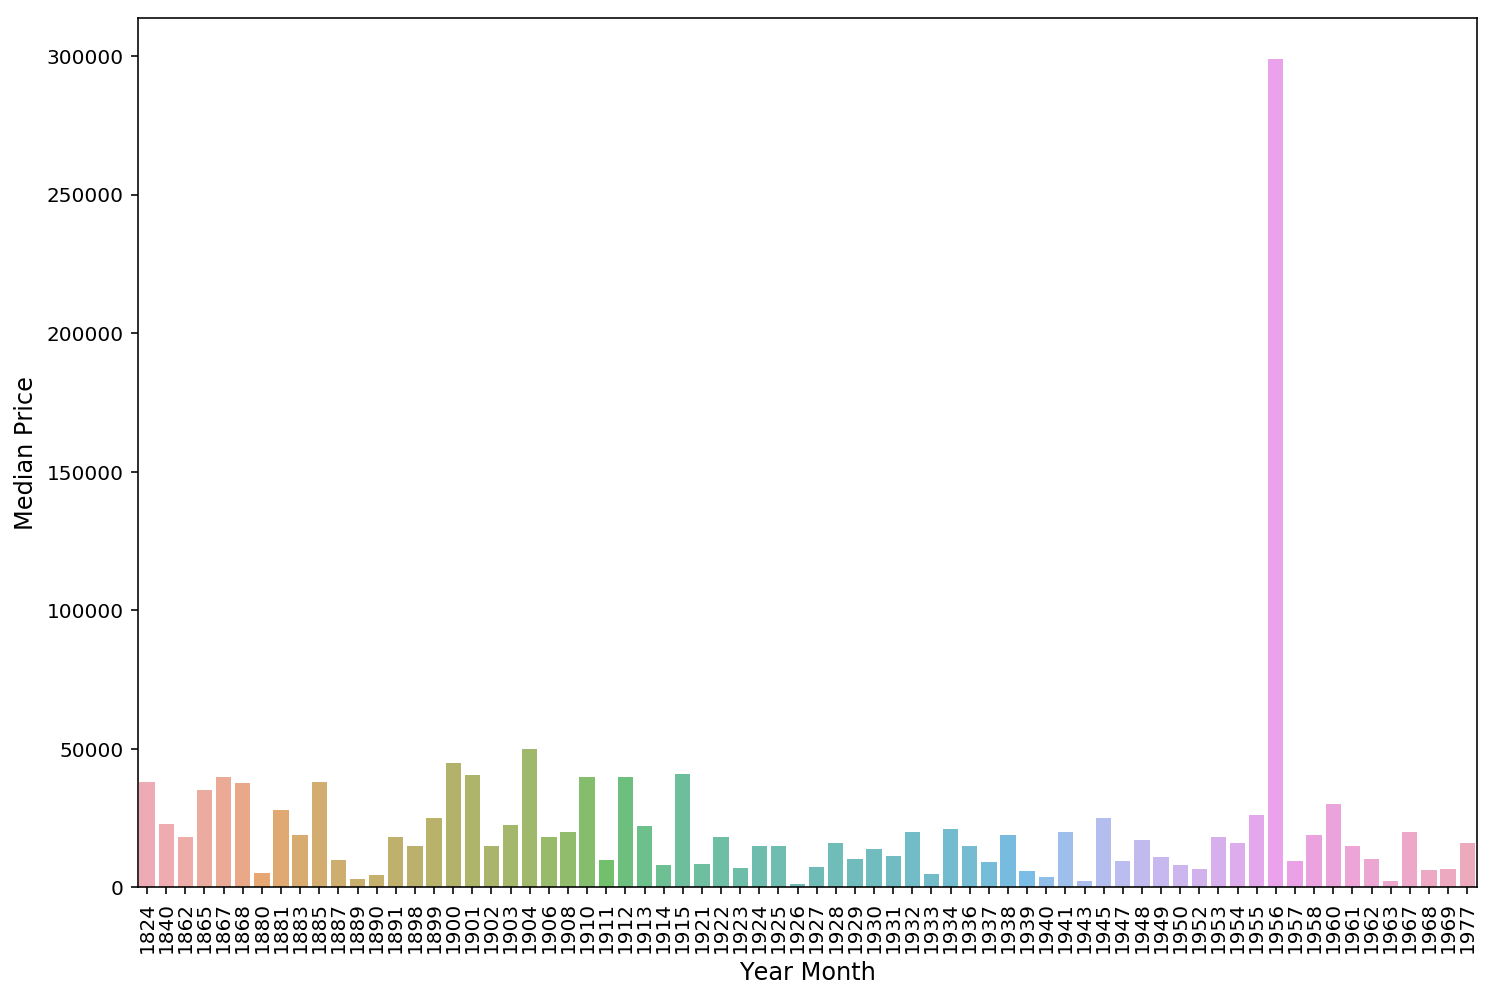

In [27]:
groupedTime_df = df_1.groupby('artist_birth_year')['hammer_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(groupedTime_df.artist_birth_year.values, groupedTime_df.hammer_price.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# Machine Learning Models

In [28]:
# seprate the dataframe into target variable y and independent variables x
y = df_1["log_price"]
x = df_1[df_1.columns.difference(['log_price', 'hammer_price'])]

In [29]:
features=list(x)

In [30]:
# encoding categorical variables to factors
import warnings
warnings.filterwarnings("ignore")

label_encoder = dict()

for feature in (x.select_dtypes(include=['object']).columns):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(x[feature].astype(str))
    x.loc[:, feature]  = label_encoder[feature].transform(x[feature].astype(str))
    
    #df[cat] = le.fit_transform(df[cat].astype(str))

encoding feature: artist_name
encoding feature: artist_nationality
encoding feature: auction_date
encoding feature: category
encoding feature: currency
encoding feature: edition
encoding feature: location
encoding feature: materials
encoding feature: title
encoding feature: year_of_execution


In [32]:
# splitting to 0.3 test size
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# xgb_X_train,xgb_X_test,xgb_y_train,xgb_y_test = ms.train_test_split(x,y,test_size=0.3,random_state=42)
print(X_test.shape)
print(X_train.shape)

(27294, 17)
(63686, 17)


In [33]:
# 0.2 of train size for val data 
size_=int(0.2*len(X_train))
size_


12737

In [34]:
X_train_sub, Y_train_sub = X_train[:-size_],  y_train[:-size_]
X_val, Y_val = X_train[-size_:],  y_train[-size_:]

# check no. of rows and columsn
print(X_train_sub.shape)
print(Y_train_sub.shape)
print(X_val.shape)
print(Y_val.shape)

(50949, 17)
(50949,)
(12737, 17)
(12737,)


# Extreme Gradient Boosting Model
Because the dataset contains more than 25% of missing values, and I intend to not drop any useful information, I choose to use XGBoost to handle the missing values

In [35]:
dtrain = xgb.DMatrix(X_train,y_train,feature_names=X_train.columns)
#dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)

dtest = xgb.DMatrix(X_test,feature_names=X_train.columns)

dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub, 
                        feature_names=X_train.columns.values)
d_val = xgb.DMatrix(X_val, 
                    Y_val, 
                    feature_names=X_train.columns.values)

In [36]:
# set xgboost parameters
xgb_params = {
    'eta': 0.01,
    'max_depth': 10,
    'subsample': .8,
    'colsample_bytree': .8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse', 
    'silent': 0
}

# train model
sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=1000,
                      evals=[(d_val, 'val')],
                      early_stopping_rounds=10, 
                      verbose_eval=20)

[0]	val-rmse:9.26697
Will train until val-rmse hasn't improved in 10 rounds.
[20]	val-rmse:7.59753
[40]	val-rmse:6.23381
[60]	val-rmse:5.1208
[80]	val-rmse:4.21214
[100]	val-rmse:3.47254
[120]	val-rmse:2.87099
[140]	val-rmse:2.38351
[160]	val-rmse:1.98966
[180]	val-rmse:1.67348
[200]	val-rmse:1.42091
[220]	val-rmse:1.22072
[240]	val-rmse:1.06328
[260]	val-rmse:0.941133
[280]	val-rmse:0.847437
[300]	val-rmse:0.775645
[320]	val-rmse:0.720762
[340]	val-rmse:0.680064
[360]	val-rmse:0.649636
[380]	val-rmse:0.626339
[400]	val-rmse:0.608519
[420]	val-rmse:0.594539
[440]	val-rmse:0.584076
[460]	val-rmse:0.575146
[480]	val-rmse:0.567396
[500]	val-rmse:0.560917
[520]	val-rmse:0.555204
[540]	val-rmse:0.550195
[560]	val-rmse:0.545427
[580]	val-rmse:0.541548
[600]	val-rmse:0.537693
[620]	val-rmse:0.534194
[640]	val-rmse:0.53104
[660]	val-rmse:0.528512
[680]	val-rmse:0.525776
[700]	val-rmse:0.523199
[720]	val-rmse:0.520652
[740]	val-rmse:0.518238
[760]	val-rmse:0.515771
[780]	val-rmse:0.513558
[800]

In [38]:
full_model = xgb.train(xgb_params,
                       dtrain, 
                       num_boost_round=sub_model.best_iteration,
                       verbose_eval=20)


In [39]:
# 
xgb_pred = full_model.predict(dtest)
errorScore=np.sqrt(((xgb_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)

Root Mean Squared error: 0.49


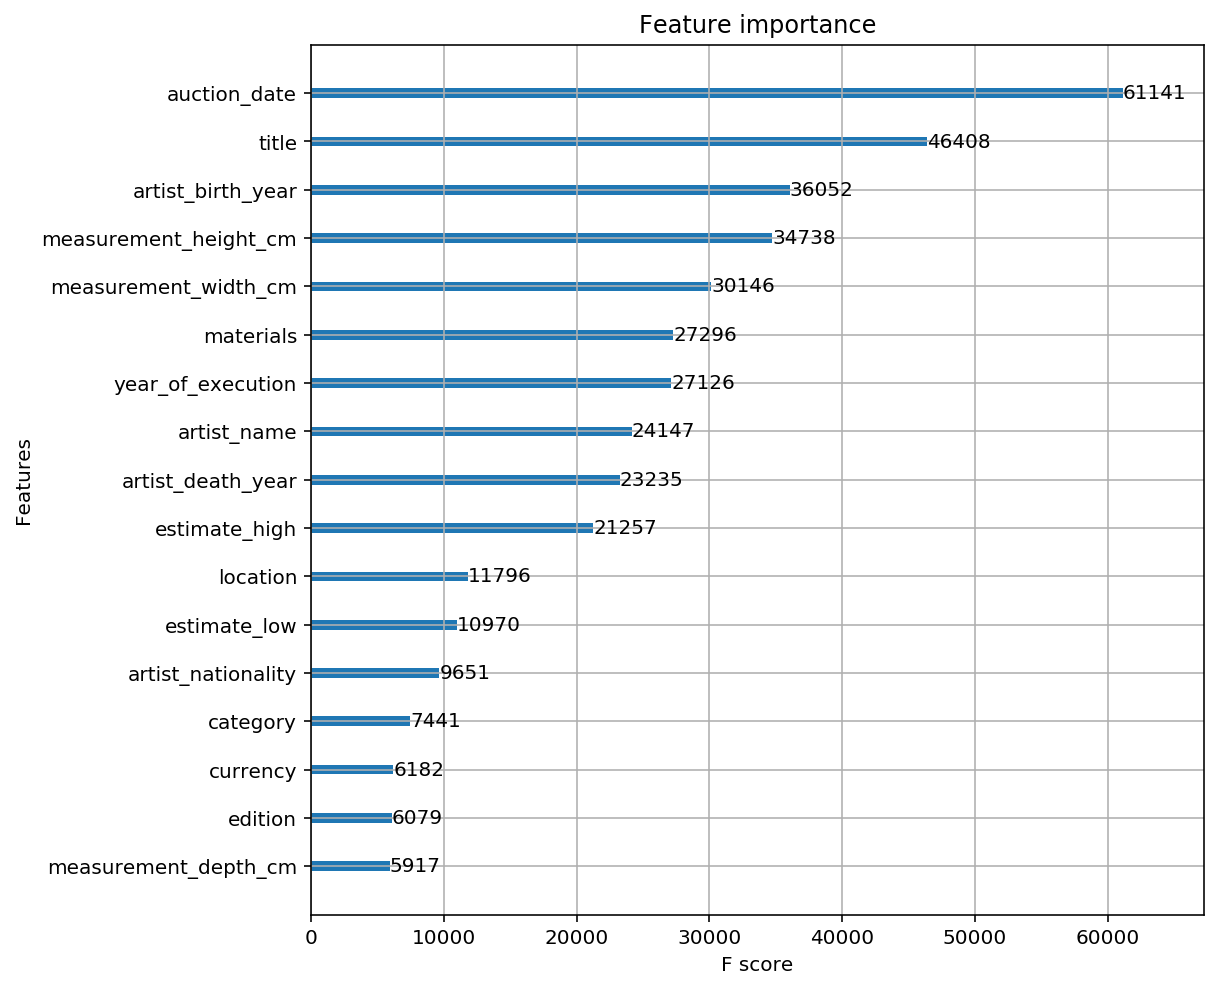

In [40]:
# plot feature importance 
fig, ax = plt.subplots(figsize=(8, 8))
xgb.plot_importance(sub_model,ax=ax)
plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=10)  # fontsize of the figure title